## Setup

Load libraries

In [1]:
import sys
sys.path.append('../') 

In [2]:
import pickle
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from utils.model_utils import split_data

## Load Data

We'll load data and check the properties.

In [3]:
data = pd.read_parquet('../data/clean_data.parquet.gzip')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6646208 entries, 0 to 6646207
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   idx              int64  
 1   northing         float64
 2   easting          float64
 3   amplitude        float64
 4   unwrapped_phase  float64
 5   coherence        float64
 6   incidence_angle  float64
 7   bare_earth_dem   float32
 8   vegetation_ht    float32
 9   wrapped_phase    float64
 10  snow_depth       float32
 11  elevation        float64
dtypes: float32(3), float64(8), int64(1)
memory usage: 532.4 MB


,idx,northing,easting,amplitude,unwrapped_phase,coherence,incidence_angle,bare_earth_dem,vegetation_ht,wrapped_phase,snow_depth,elevation
0,406,4.322002e+06,221217.233272,0.261970,-10.066239,0.478974,0.782536,2723.885986,1.194092,2.104467,0.370529,2724.164062
1,407,4.322002e+06,221220.233513,0.261970,-10.170159,0.528913,0.782536,2723.309082,1.335449,1.921621,0.652512,2724.658569
2,408,4.322002e+06,221223.233754,0.272913,-10.170159,0.572173,0.779307,2722.560059,2.762695,2.226624,0.652512,2725.022705
3,409,4.322002e+06,221226.233995,0.272913,-10.170159,0.572173,0.779307,2722.343018,3.000488,2.226624,0.594406,2725.022705
4,410,4.322002e+06,221229.234236,0.272913,-10.013985,0.633912,0.779307,2722.259033,2.894531,1.921621,0.626389,2725.066040


## Data Splitting

* Train: 80%
* Tune: 10%
* Test: 10%

In [4]:
# First, we will divide the data into two sets: one with vegation and one without vegation

vegetation_df = data[data.vegetation_ht >= 0.5]
no_vegetation_df = data[data.vegetation_ht < 0.5].drop('vegetation_ht', axis=1)

In [5]:
full_splits = split_data(data)
vegetation_splits = split_data(vegetation_df) 
no_vegetation_splits = split_data(no_vegetation_df)

## Data Exploration

* Descriptive Statistics

In [6]:
mappings=dict(zip(['full', 'vegetation', 'no_vegetation'],  [full_splits, vegetation_splits, no_vegetation_splits]))

In [7]:
for key, value in mappings.items():
    print(f"{key} data set:")
    print("---------------")
    print(f"X shape (train): {value['X_train'].shape}")
    print(f"y shape (train): {value['y_train'].shape}")
    print(f"X shape (test): {value['X_test'].shape}")
    print(f"y shape (test): {value['y_test'].shape}")
    print('')

full data set:
---------------
X shape (train): (5316966, 11)
y shape (train): (5316966,)
X shape (test): (664621, 11)
y shape (test): (664621,)

vegetation data set:
---------------
X shape (train): (2154481, 11)
y shape (train): (2154481,)
X shape (test): (269311, 11)
y shape (test): (269311,)

no_vegetation data set:
---------------
X shape (train): (3162483, 10)
y shape (train): (3162483,)
X shape (test): (395311, 10)
y shape (test): (395311,)



In [8]:
for key, value in mappings.items():
    print("===========================================")
    print(f'{key} data set descriptive statistics:')
    print("===========================================")
    data_=value['X_train'].drop(columns=['idx', 'northing', 'easting']).assign(snow_depth=value['y_train'])
    display(data_.describe().T)
    print('')

full data set descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
amplitude,5316966.0,0.230862,0.181365,0.014839,0.098009,0.147266,0.327778,6.111136
unwrapped_phase,5316966.0,-8.251427,0.900483,-15.263859,-8.758775,-8.281919,-7.689527,-0.064480
coherence,5316966.0,0.571354,0.161949,0.002759,0.459691,0.593943,0.695926,0.979328
incidence_angle,5316966.0,0.869836,0.179141,0.138086,0.774223,0.904269,0.988384,1.951571
bare_earth_dem,5316966.0,3009.075439,116.266624,2490.905029,3007.157959,3031.874023,3076.621826,3157.363037
vegetation_ht,5316966.0,3.473066,5.302997,0.000000,0.000000,0.181152,6.378662,34.620117
wrapped_phase,5316966.0,-1.243282,1.301082,-3.141549,-2.139251,-1.596517,-0.757739,3.141589
elevation,5316966.0,3016.442156,114.410963,2500.195190,3012.436768,3036.379883,3084.196655,3168.000000
snow_depth,5316966.0,1.074107,0.282697,0.000168,0.900559,1.087570,1.258225,1.999924



vegetation data set descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
amplitude,2154481.0,0.389459,0.178823,0.014839,0.275748,0.352089,0.462492,6.111136
unwrapped_phase,2154481.0,-8.731678,0.810194,-15.263859,-9.175428,-8.670464,-8.233402,-0.470978
coherence,2154481.0,0.475873,0.153792,0.005907,0.364616,0.473787,0.585865,0.967077
incidence_angle,2154481.0,0.792905,0.215397,0.136859,0.649460,0.818973,0.943665,1.951571
bare_earth_dem,2154481.0,2957.340820,154.861893,2490.961914,2868.172119,3003.469971,3076.562988,3157.378906
vegetation_ht,2154481.0,8.463601,5.249680,0.500000,4.146484,8.160400,12.082275,34.620117
wrapped_phase,2154481.0,-1.031604,1.665227,-3.141509,-2.257841,-1.690710,-0.085187,3.141589
elevation,2154481.0,2969.232367,153.871534,2500.195190,2881.583008,3015.555664,3087.967529,3168.000000
snow_depth,2154481.0,1.099021,0.263530,0.000412,0.950363,1.109299,1.254563,1.999924



no_vegetation data set descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
amplitude,3162483.0,0.122870,0.069171,0.015984,0.086000,0.105434,0.133844,3.549916
unwrapped_phase,3162483.0,-7.924362,0.806909,-15.219127,-8.442944,-8.014323,-7.332420,-0.059455
coherence,3162483.0,0.636410,0.132370,0.002759,0.563465,0.655899,0.730493,0.979328
incidence_angle,3162483.0,0.922204,0.124870,0.283877,0.840318,0.940821,1.003839,1.945104
bare_earth_dem,3162483.0,3044.303223,57.661114,2492.033936,3019.762939,3035.700928,3076.625977,3157.363037
wrapped_phase,3162483.0,-1.387990,0.950718,-3.141549,-2.060116,-1.546000,-0.876405,3.141422
elevation,3162483.0,3048.590134,57.667785,2501.129150,3023.214355,3039.763306,3081.797607,3168.000000
snow_depth,3162483.0,1.057139,0.293694,0.000168,0.869309,1.066086,1.260910,1.999924


* Plotting correlation matrix

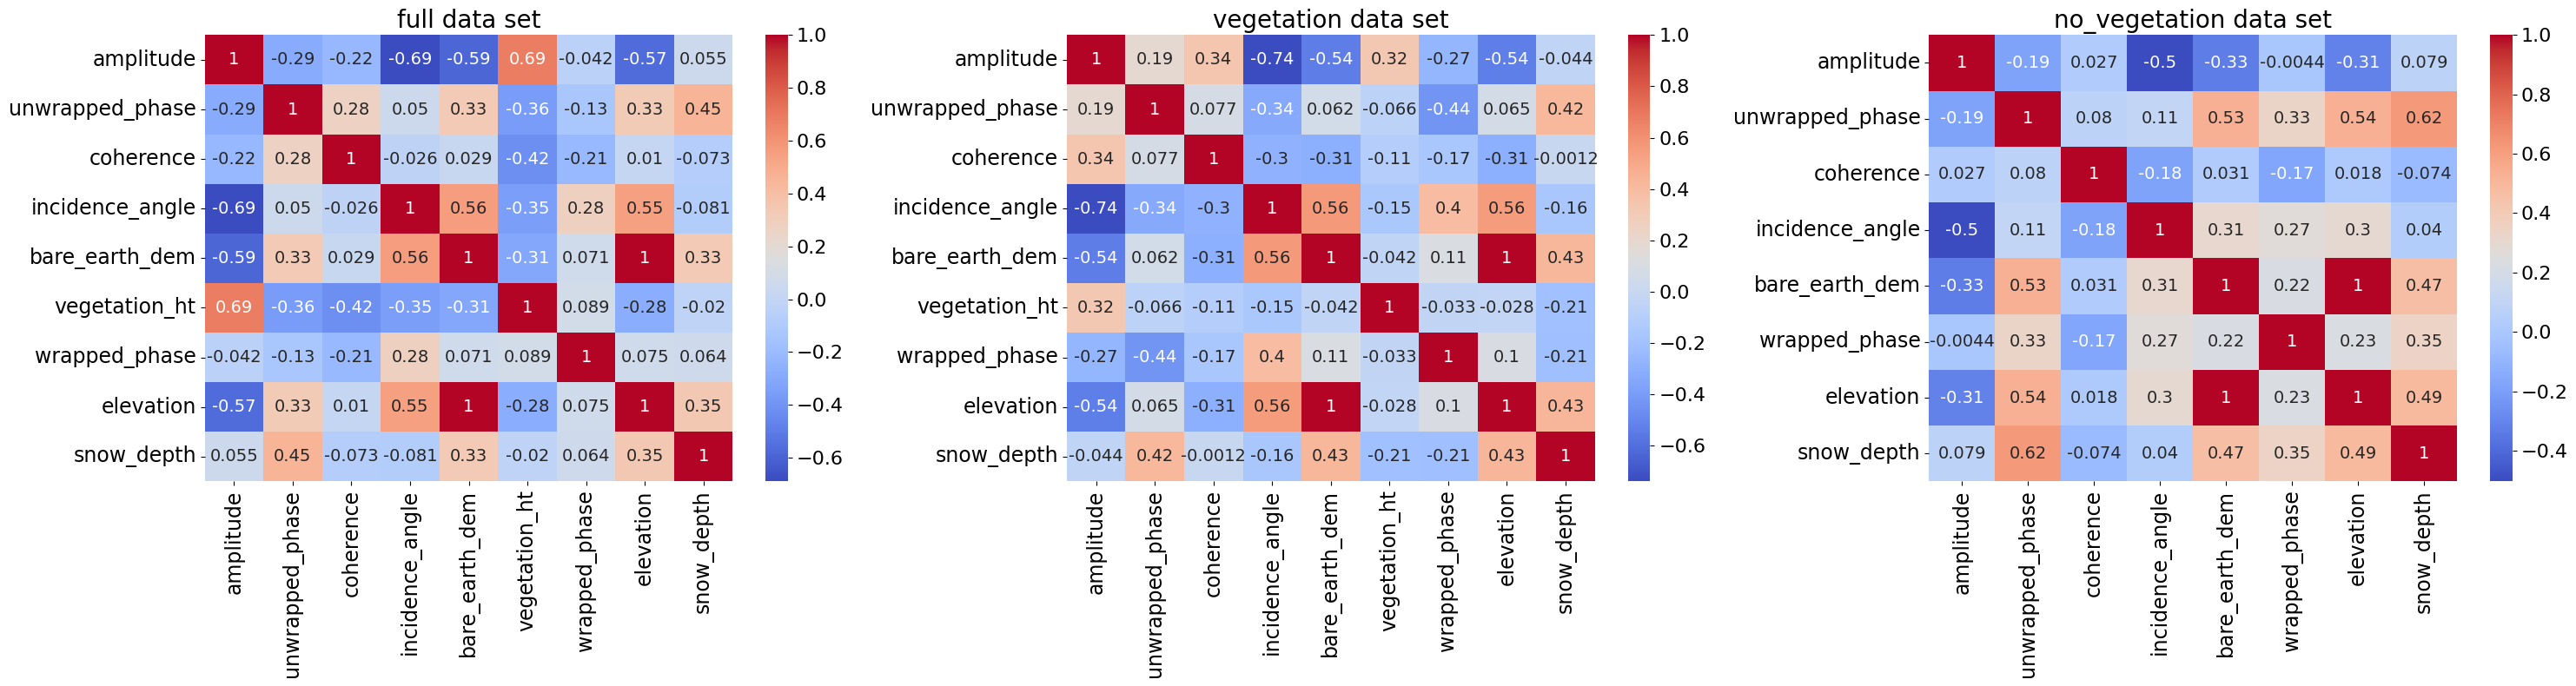

In [9]:
plt.figure(figsize=(30, 8))

for i, (key, value) in enumerate(mappings.items()):
    plt.subplot(1, 3, i+1)
    ax=sns.heatmap(
        (
            value['X_train'].
            drop(columns=['idx', 'northing', 'easting']).
            assign(snow_depth=value['y_train']).corr()
        ),
        cmap='coolwarm', 
        annot=True,
        #fmt='.2f',
        annot_kws={'fontsize': 14}
    )
    plt.title(f'{key} data set', fontsize=20)
    ax.tick_params(axis='x', labelsize=17)
    ax.tick_params(axis='y', labelsize=17) 
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)
plt.tight_layout()

plt.savefig('../plots/correlation_matrix.png', dpi=300)

* Plotting the distribution of all variables

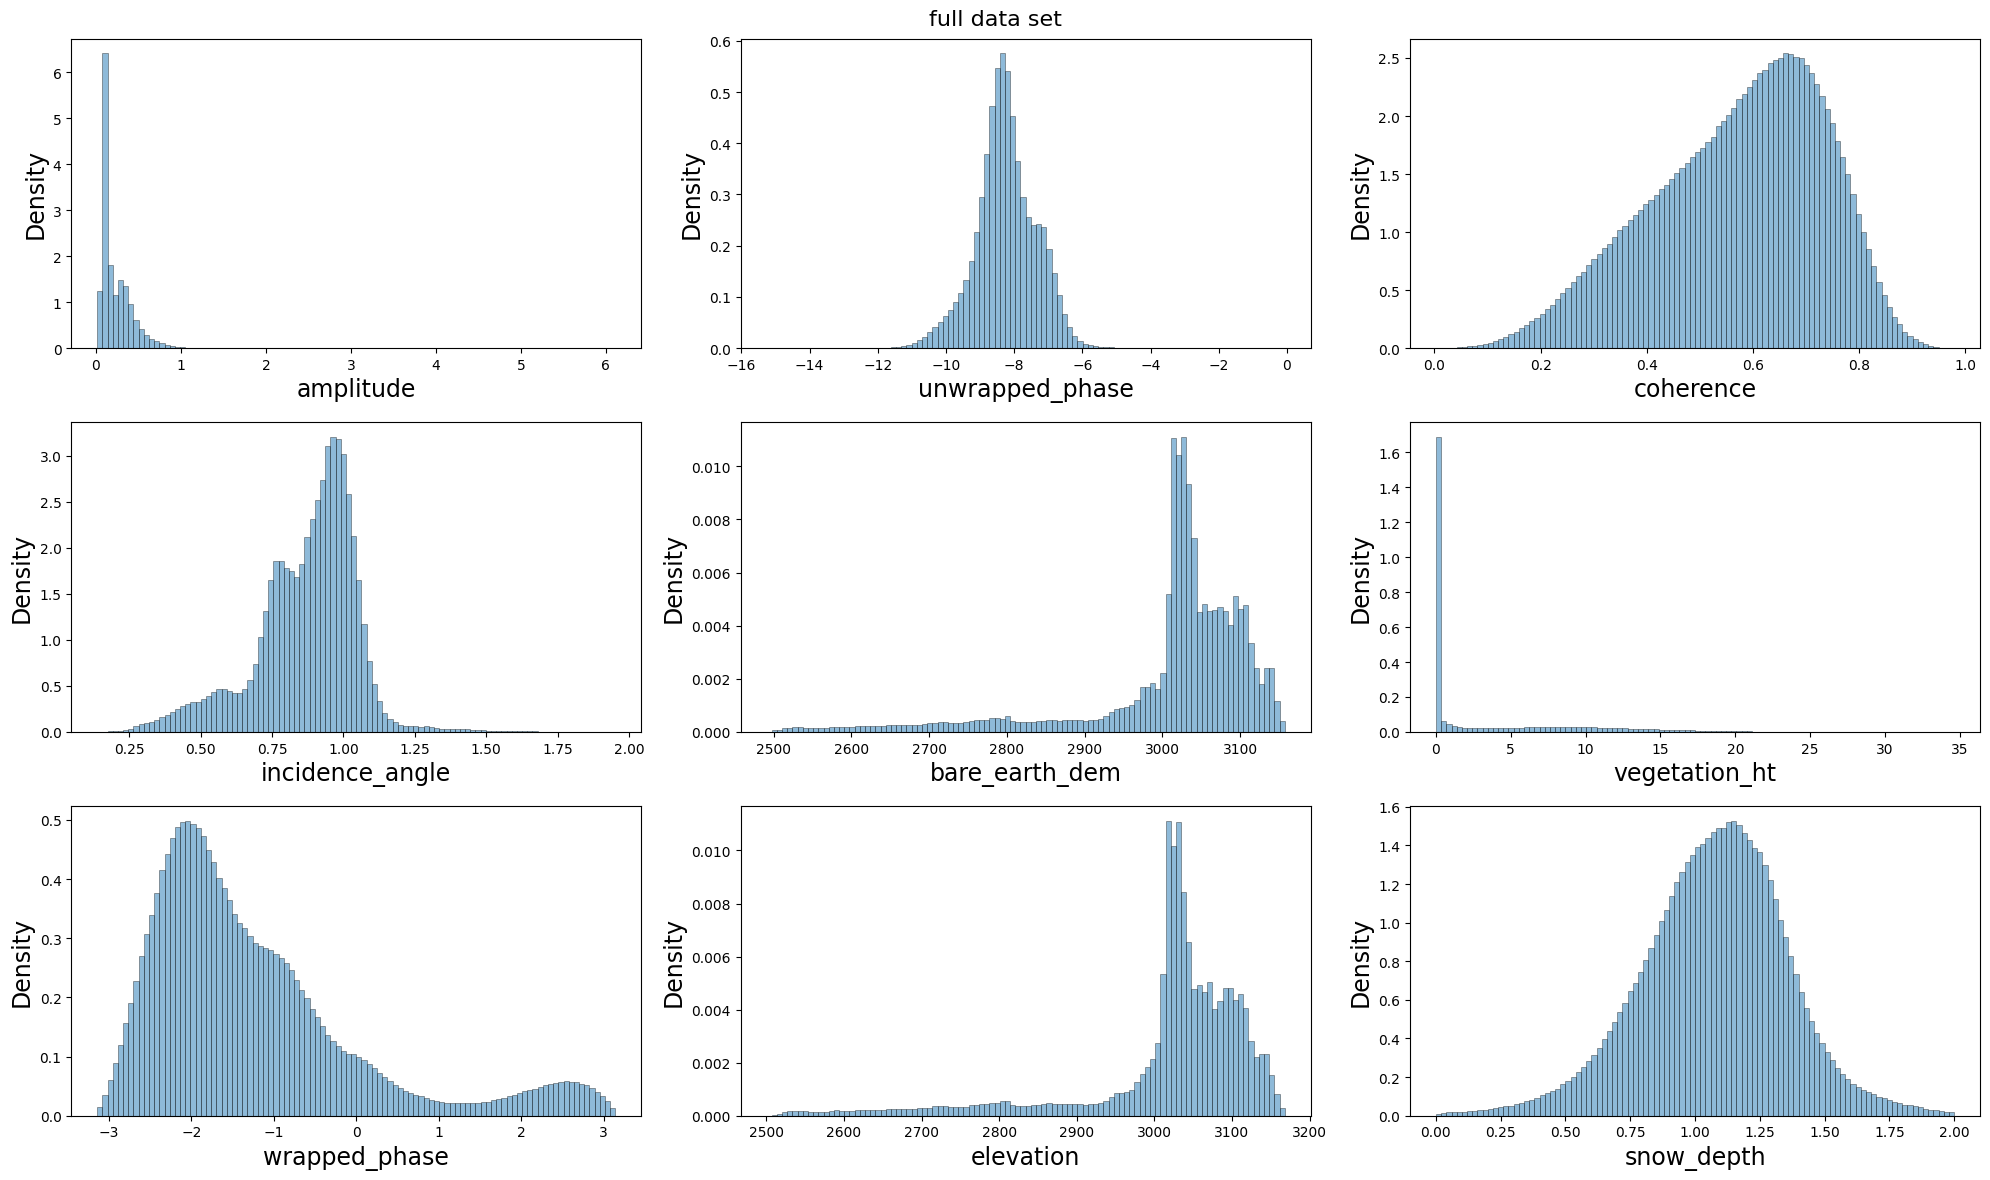

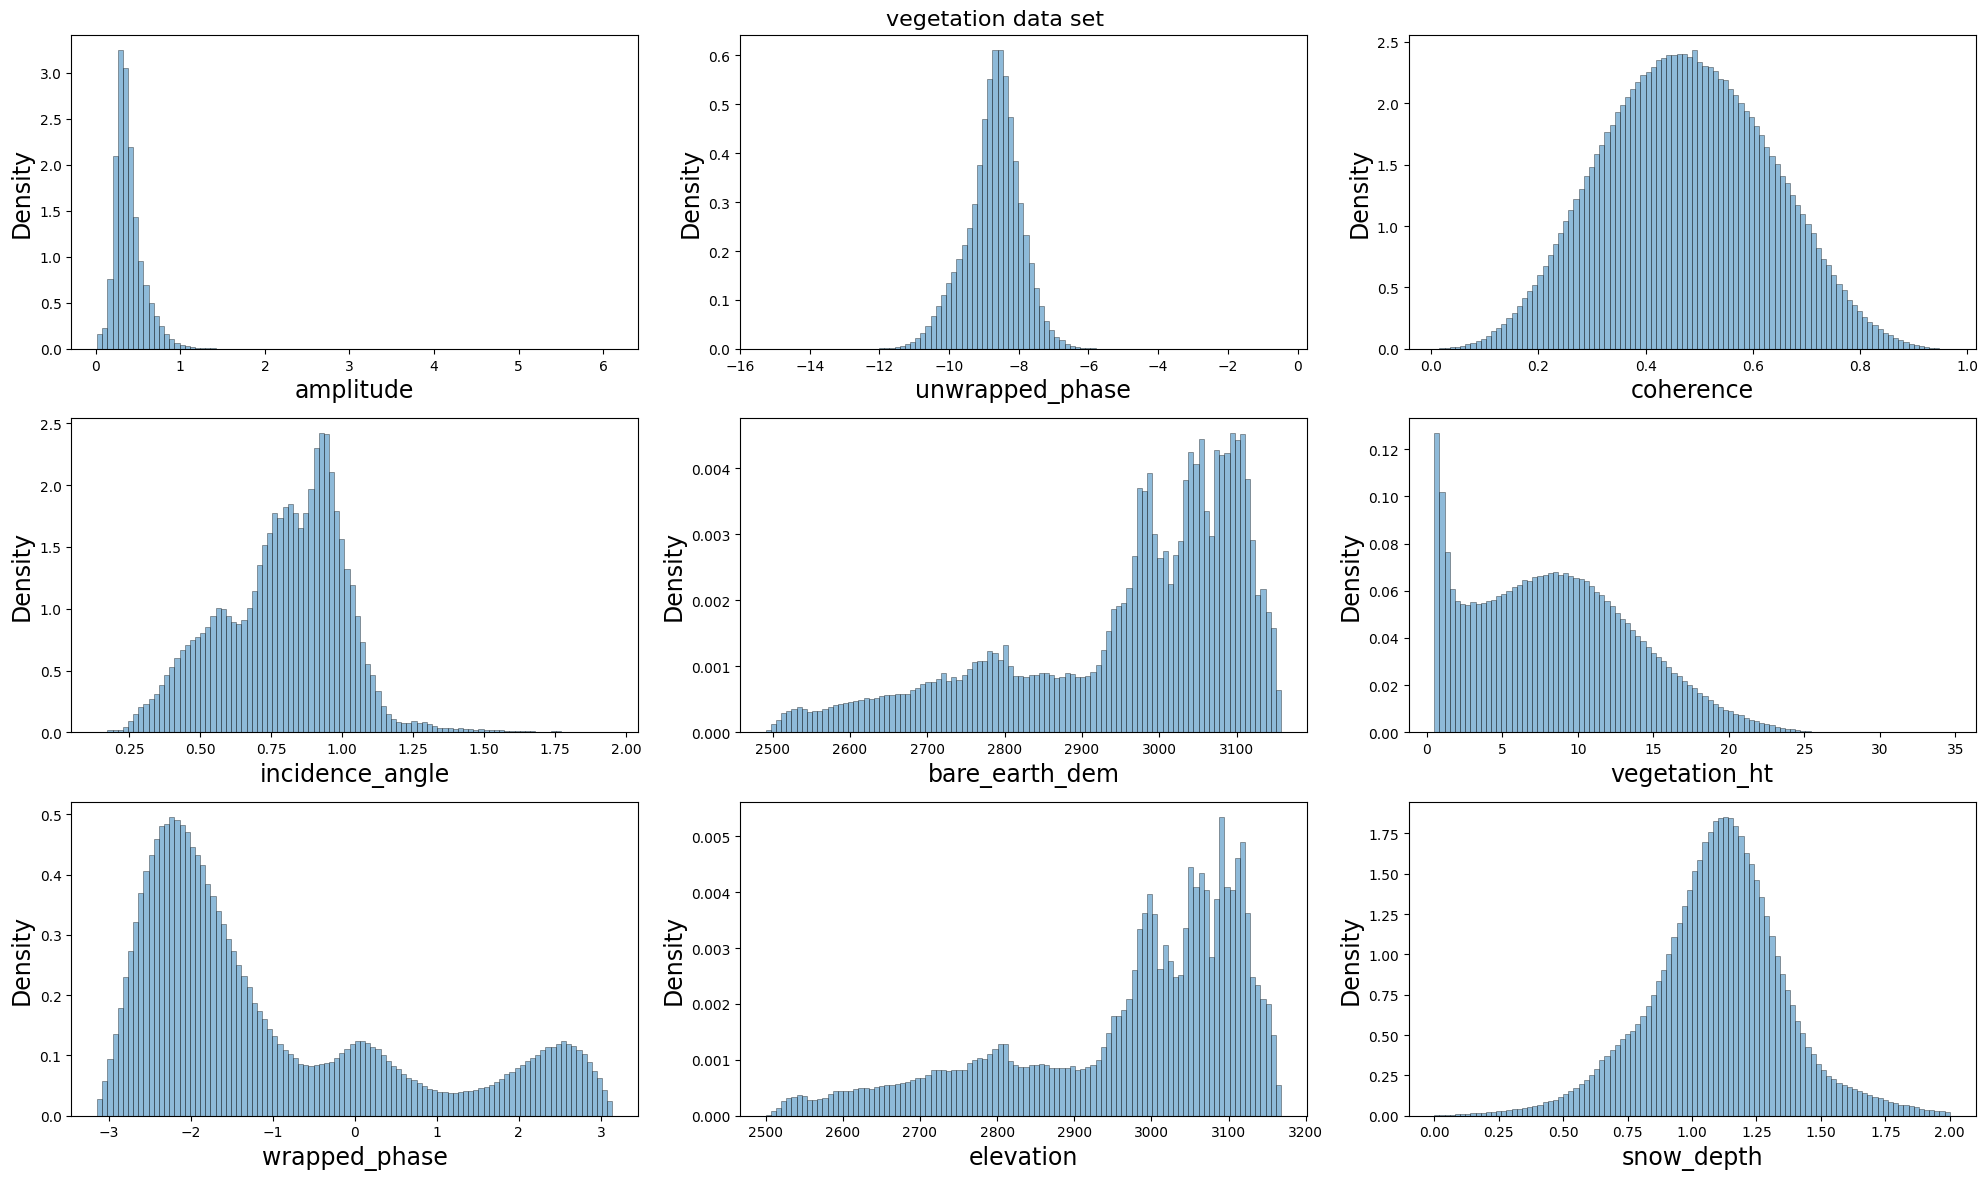

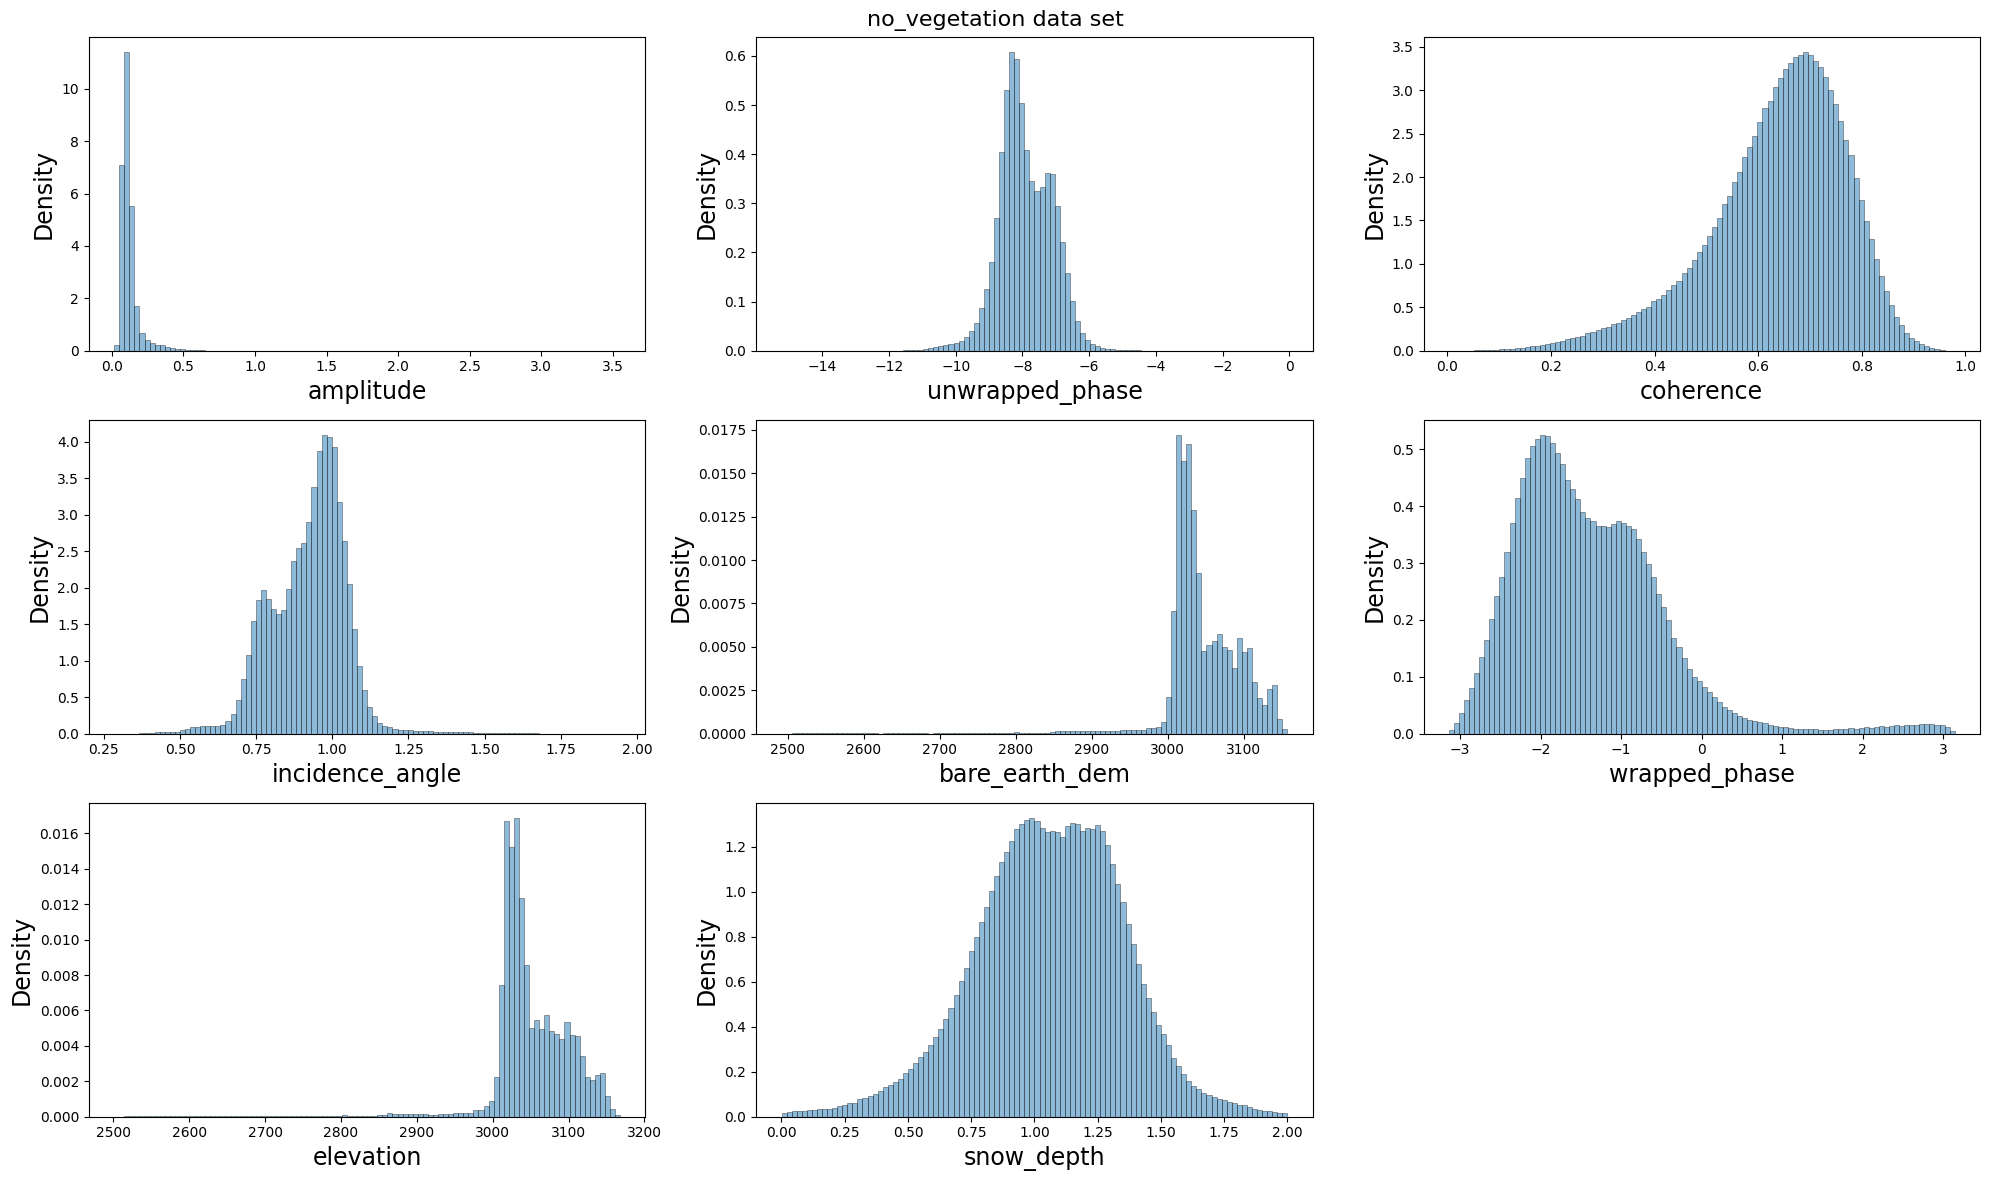

In [10]:
for key, value in mappings.items():
    plt.figure(figsize=(20,12))
    combined_df = value['X_train'].drop(columns=['idx', 'northing', 'easting']).assign(snow_depth=value['y_train'])
    plt.suptitle(f'{key} data set', fontsize=16)
    for i, col in enumerate(combined_df.columns):
        plt.subplot(3, 3, i+1)
        plt.hist(combined_df[col], bins=100, alpha=0.5, density=True, edgecolor='black', linewidth=0.5)
        plt.xlabel(col, fontsize=17)
        plt.ylabel('Density', fontsize=17)
    plt.tight_layout()
    plt.savefig(f'../plots/{key}_histograms.png', dpi=300)

### Pickle Splits for Later Use

In [11]:
with open('../data/full_splits.pkl', 'wb') as f:
    pickle.dump(full_splits, f)

with open('../data/vegetation_splits.pkl', 'wb') as f:
    pickle.dump(vegetation_splits, f)

with open('../data/no_vegetation_splits.pkl', 'wb') as f:
    pickle.dump(no_vegetation_splits, f)